['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


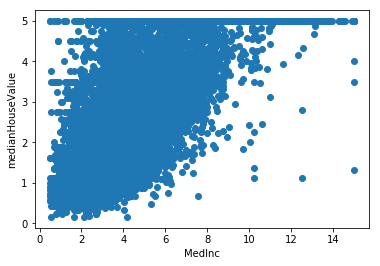

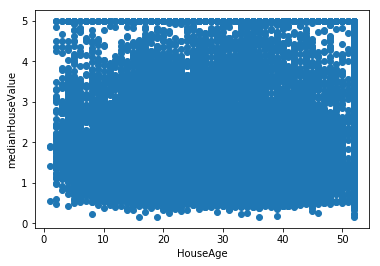

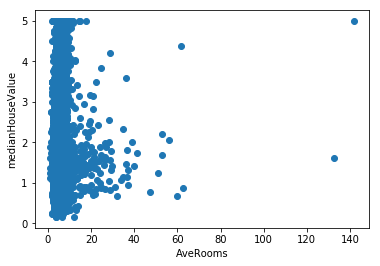

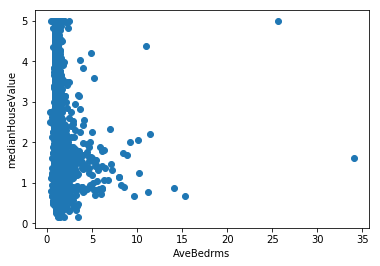

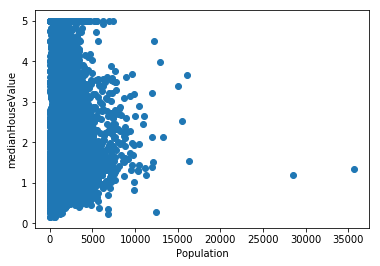

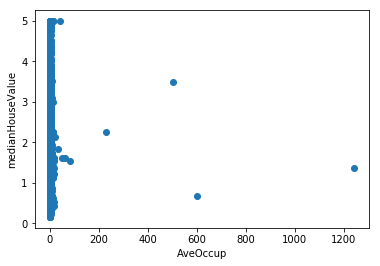

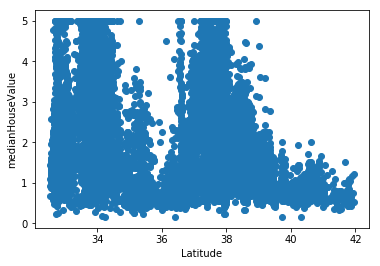

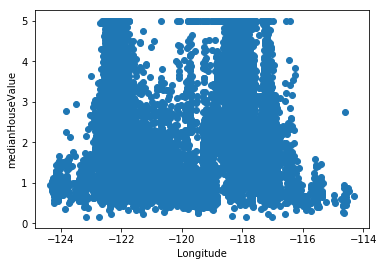

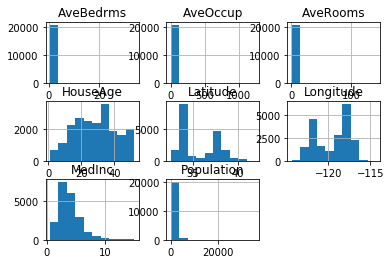

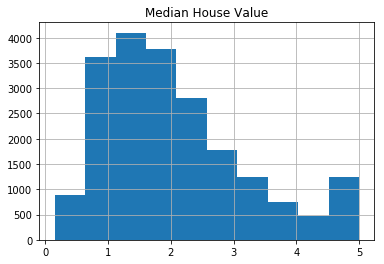

In [28]:
#By Jackson Keppen

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import fetch_california_housing
from pandas import DataFrame

house_info = fetch_california_housing()

#Placing the data into a dataframe for visualization and manipuation
df = pd.DataFrame(data = house_info.data[:,:], columns = house_info.feature_names)
df_target = pd.DataFrame(data = house_info.target[:,], columns = ["Median House Value"])
print(house_info.feature_names)
#print(df)
#print(house_dataset)

#Establishing an array of the column names to be called in loops
models = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

medianHouseValue = house_info.target[:,]

#creating the scatter plots to visualize the targets depndence on each variable.
i = 0
for model in models:

    model_title = model   
    model = house_info.data[:,i]
    
    plt.scatter(model, medianHouseValue,  label = model_title)
    plt.xlabel(model_title)
    plt.ylabel("medianHouseValue")
    plt.show()
    i = i+1

#Binned into histograms
hist = df.hist(bins = 10)
hist_target = df_target.hist(bins = 10)

plt.show()

In the histograms, there are a number of outliers that skew the data, particularly for average bedrooms, average occupancy, average rooms, and population. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from numpy import array
#from sklearn_pandas import DataFrameMapper

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

#Setting up the test data
X_train, X_test, y_train, y_test = train_test_split(df, df_target)
    
#Finds the linear regression model for X and Y train, and then scores how well the trained X and Y fit into it.
reg = LinearRegression().fit(X_train, y_train)
reg_test_cr_scorei = cross_val_score(reg, X_test, y_test)
reg_test_cr_score = np.mean(reg_test_cr_scorei)

#Does a regression with the Ridge program, using default parameters and alpha = 1.0
rid = Ridge(alpha=1.0)
rid_fit = rid.fit(X_train, y_train)
rid_test_cr_scorei = cross_val_score(rid_fit, X_test, y_test)
rid_test_cr_score = np.mean(rid_test_cr_scorei)

#Does a regression with the LAsso program, using default parameters and alpha = 0.1
las = linear_model.Lasso(alpha = 0.1)
las_fit = las.fit(X_train, y_train)
las_test_cr_scorei = cross_val_score(las_fit, X_test, y_test)
las_test_cr_score = np.mean(las_test_cr_scorei)

#Does a regression with the ElasticNet program using default parameters
ela = ElasticNet()
ela_fit = ela.fit(X_train, y_train)
ela_test_cr_scorei = cross_val_score(ela_fit, X_test, y_test)
ela_test_cr_score = np.mean(ela_test_cr_scorei)


print()
print('The average cross_val score comparing the trained to the test for Linear Regression is: ', reg_test_cr_score)
print('The average cross_val score comparing the trained to the test for Ridge is: ', rid_test_cr_score)
print('The average cross_val score comparing the trained to the test for Lasso is: ', las_test_cr_score)
print('The average cross_val score comparing the trained to the test for ElasticNet is: ', ela_test_cr_score)
print()
print()



The average cross_val score comparing the trained to the test for Linear Regression is:  0.3977203032668822
The average cross_val score comparing the trained to the test for Ridge is:  0.3971956197223025
The average cross_val score comparing the trained to the test for Lasso is:  0.47603943343656635
The average cross_val score comparing the trained to the test for ElasticNet is:  0.4349952944906971




In [3]:
#This scetion is the same as the one above, but the data is scaled and normalized. This is done to improve the regression fits. 
X_train, X_test, y_train, y_test = train_test_split(df, df_target)
    
scalerx = StandardScaler().fit(X_train)
scaled_X_train = scalerx.transform(X_train)
scaled_X_test = scalerx.transform(X_test)

scalery = StandardScaler().fit(y_train)
scaled_y_train = scalery.transform(y_train)
scaled_y_test = scalery.transform(y_test)
   
regs = LinearRegression().fit(scaled_X_train,scaled_y_train)
regs_test_cr_scorei = cross_val_score(regs, scaled_X_test, scaled_y_test)
regs_test_cr_score = np.mean(regs_test_cr_scorei)
   
rids = Ridge(alpha=1.0)
rids_fit = rids.fit(scaled_X_train, scaled_y_train) 
rids_test_cr_scorei = cross_val_score(rids_fit, scaled_X_test, scaled_y_test)
rids_test_cr_score = np.mean(rids_test_cr_scorei)
   
lass = linear_model.Lasso(alpha = 0.1)
lass_fit = lass.fit(scaled_X_train, scaled_y_train)
lass_test_cr_scorei = cross_val_score(lass_fit, scaled_X_test, scaled_y_test)
lass_test_cr_score = np.mean(lass_test_cr_scorei)
   
elas = ElasticNet()
elas_fit = elas.fit(scaled_X_train, scaled_y_train) 
elas_test_cr_scorei = cross_val_score(elas_fit, scaled_X_test, scaled_y_test)
elas_test_cr_score = np.mean(elas_test_cr_scorei)

print()
print('The average tested cross_val comparing the trained to the test for the scaled Linear Regression is: ', regs_test_cr_score)
print('The average tested cross_val comparing the trained to the test for the scaled Ridge is: ', rids_test_cr_score)
print('The average tested cross_val comparing the trained to the test for for the scaled Lasso is: ', lass_test_cr_score)
print('The average tested cross_val comparing the trained to the test for for the scaled ElasticNet is: ', elas_test_cr_score)
print() 


The average tested cross_val comparing the trained to the test for the scaled Linear Regression is:  -3.0507561854039813
The average tested cross_val comparing the trained to the test for the scaled Ridge is:  -2.691753827500913
The average tested cross_val comparing the trained to the test for for the scaled Lasso is:  0.49568955548408056
The average tested cross_val comparing the trained to the test for for the scaled ElasticNet is:  0.169421963913707



Scaling helped the scores for Linear Regression and Ridge, but reduced them significantly for Lasso and Elasticnet. This is likely due to poorly chosen parameters. The next section will develope better parameters for the fit. 

In [4]:
from sklearn.model_selection import GridSearchCV

#Support Vector Machine algorithms are not scale invariant,\
#so it is highly recommended to scale your data. For example,\
#scale each attribute on the input vector X to [0,1] or [-1,+1], \
#or standardize it to have mean 0 and variance 1. Note that the \
#same scaling must be applied to the test vector to obtain meaningful\
#results. See section Preprocessing data for more details on scaling\
#and normalization.

estimators = [regs, rids, lass, elas]
#print(estimators[1].get_params().keys())
#print(estimators[2].get_params().keys())
#print(estimators[3].get_params().keys())

#The following sections iterate over the different values of parameters to better fit the data. 
param_grid_rids = [
  {'alpha' : [10^-3, 10^-2, 10^-1, 1, 10, 100, 1000], 'solver' : ['auto', 'svd', 'cholesky', 'sparse_cg']}
]

grid_search_rids = GridSearchCV(rids, param_grid_rids)
grid_fit_rids = grid_search_rids.fit(X_train, y_train)

print("Best parameters set found on Ridge set:")
print()
print(grid_fit_rids.best_params_)
    
param_grid_lass = [
  {'alpha' : [10^-3, 10^-2, 10^-1, 1, 10, 100, 1000], 'max_iter' : [1, 10, 100, 1000, 10000]}
]

grid_search_lass = GridSearchCV(lass, param_grid_lass)
grid_fit_lass = grid_search_lass.fit(X_train, y_train)
print()
print("Best parameters set found on Lasso set:")
print()
print(grid_fit_lass.best_params_)

param_grid_elas= [
  {'alpha' : [1, 10, 100], 'l1_ratio' : [0.001, 0.1, 0.5, 1.0], 'max_iter' : [10, 50, 100, 1000, 10000]}
]

grid_search_elas = GridSearchCV(elas, param_grid_elas)
grid_fit_elas = grid_search_elas.fit(X_train, y_train)
print()
print("Best parameters set found on ElasticNet set:")
print()
print(grid_fit_elas.best_params_)


Best parameters set found on Ridge set:

{'alpha': 100, 'solver': 'auto'}

Best parameters set found on Lasso set:

{'alpha': 1, 'max_iter': 10}

Best parameters set found on ElasticNet set:

{'alpha': 1, 'l1_ratio': 0.001, 'max_iter': 50}



The best parameters found above can be used in the plots below to visualize the effect of the parameters on the fit. 


Ridge, varying alpha


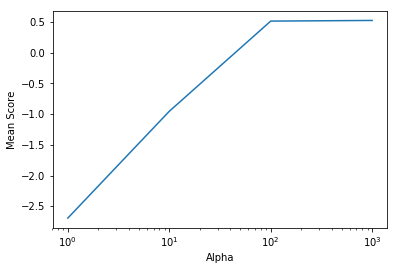

Lasso, varying alpha


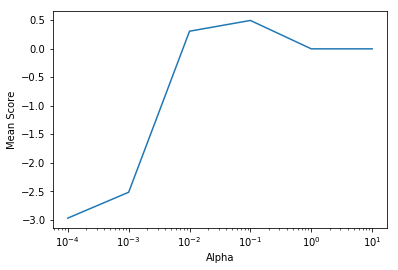

Lasso, varying iterations


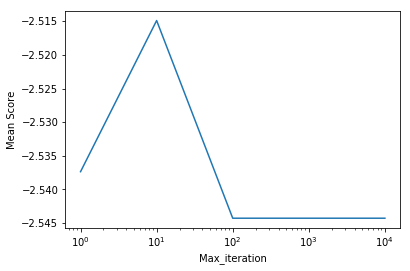


ElasticNet, varying alpha


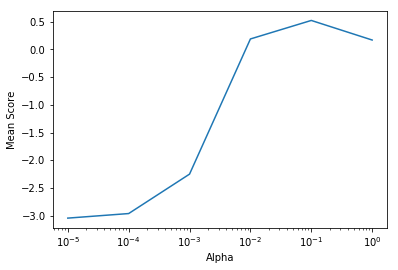


ElasticNet, varying l1_ratio


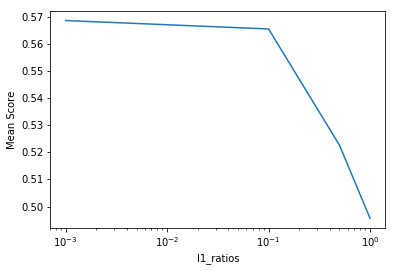


ElasticNet, varying iterations


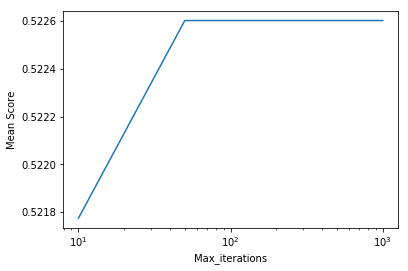

In [5]:
#Ridge
#Iterating over the differnt values to show the best fit
alphas = [ 1, 10, 100, 1000]
score_plot = [0,0,0,0]
j = 0
for alphaa in alphas:
    rids = Ridge(alpha=alphaa)
    rids_fit = rids.fit(scaled_X_train, scaled_y_train)  
    rids_test_cr_scorei = cross_val_score(rids_fit, scaled_X_test, scaled_y_test)
    rids_test_cr_score = np.mean(rids_test_cr_scorei)
    score_plot[j] = rids_test_cr_score
    j+=1
print()
print('Ridge, varying alpha')
plt.semilogx(alphas,score_plot)
plt.xlabel('Alpha')
plt.ylabel('Mean Score')
plt.show()
#print(score_plot)

#Lasso
alphas = [0.0001,0.001, 0.01,0.1, 1, 10]
max_iters = [1, 10, 100, 1000, 10000]

score_plot = [0,0,0,0,0,0]
j = 0
for alphaa in alphas:
    lass = linear_model.Lasso(alpha = alphaa, max_iter = 10)

    lass_fit = lass.fit(scaled_X_train, scaled_y_train)
    lass_test_cr_scorei = cross_val_score(lass, scaled_X_test, scaled_y_test)
    lass_test_cr_score = np.mean(lass_test_cr_scorei)
    score_plot[j] = lass_test_cr_score
    j+=1
print('Lasso, varying alpha')    
plt.semilogx(alphas,score_plot)
plt.xlabel('Alpha')
plt.ylabel('Mean Score')
plt.show()
#print(score_plot)

score_plot = [0,0,0,0,0]
j = 0
for max_itera in max_iters:
    lass = linear_model.Lasso(alpha = 0.001, max_iter = max_itera)
    lass_fit = lass.fit(scaled_X_train, scaled_y_train)
    lass_test_cr_scorei = cross_val_score(lass_fit, scaled_X_test, scaled_y_test)
    lass_test_cr_score = np.mean(lass_test_cr_scorei)
    score_plot[j] = lass_test_cr_score
    j+=1

print('Lasso, varying iterations')  
plt.semilogx(max_iters,score_plot)
plt.xlabel('Max_iteration')
plt.ylabel('Mean Score')
plt.show()
#print(score_plot)


#Elasticnet
alphas = [ 0.00001,0.0001, 0.001, 0.01, 0.1, 1]
l1_ratios = [0.001, 0.1, 0.5, 1.0]
max_iters = [10, 50, 100, 1000]

score_plot = [0,0,0,0,0,0]
j = 0
for alphaa in alphas:
    elas = ElasticNet(alpha = alphaa, l1_ratio = 0.5, max_iter = 1000)
    elas_fit = elas.fit(scaled_X_train, scaled_y_train)
    elas_test_cr_scorei = cross_val_score(elas_fit, scaled_X_test, scaled_y_test)
    elas_test_cr_score = np.mean(elas_test_cr_scorei)
    score_plot[j] = elas_test_cr_score
    j+=1
print()
print('ElasticNet, varying alpha')  
plt.semilogx(alphas,score_plot)
plt.xlabel('Alpha')
plt.ylabel('Mean Score')
plt.show()
#print(score_plot)

score_plot = [0,0,0,0]
j = 0
for l1_ratioa in l1_ratios:
    elas = ElasticNet(alpha = 0.1, l1_ratio = l1_ratioa, max_iter = 1000)
    elas_fit = elas.fit(scaled_X_train, scaled_y_train)
    elas_test_cr_scorei = cross_val_score(elas_fit, scaled_X_test, scaled_y_test)
    elas_test_cr_score = np.mean(elas_test_cr_scorei)
    score_plot[j] = elas_test_cr_score
    j+=1
print()
print('ElasticNet, varying l1_ratio') 
plt.semilogx(l1_ratios,score_plot)
plt.xlabel('l1_ratios')
plt.ylabel('Mean Score')
plt.show()
#print(score_plot)

score_plot = [0,0,0,0]
j = 0
for max_itera in max_iters:
    elas = ElasticNet(alpha = 0.1, l1_ratio = 0.5, max_iter = max_itera)
    elas_fit = elas.fit(scaled_X_train, scaled_y_train)
    elas_test_cr_scorei = cross_val_score(elas_fit, scaled_X_test, scaled_y_test)
    elas_test_cr_score = np.mean(elas_test_cr_scorei)
    score_plot[j] = elas_test_cr_score
    j+=1

print()
print('ElasticNet, varying iterations') 
plt.semilogx(max_iters,score_plot)
plt.xlabel('Max_iterations')
plt.ylabel('Mean Score')
plt.show()
#print(score_plot)

In general, it appears that a larger number of iterations, and a smaller alpha lead to better scores. 

In [6]:


rids = Ridge(alpha=100)
rids_fit = rids.fit(scaled_X_train, scaled_y_train)  
rids_test_cr_scorei = cross_val_score(rids_fit, scaled_X_test, scaled_y_test)
rids_test_cr_score = np.mean(rids_test_cr_scorei)
print('The best Ridge Score was:',rids_test_cr_score)
print('Which corresponds to the following coefficents:')
print(rids.coef_)    
    
lass = linear_model.Lasso(alpha = 0.1, max_iter = 100)
lass_fit = lass.fit(scaled_X_train, scaled_y_train)
lass_test_cr_scorei = cross_val_score(lass_fit, scaled_X_test, scaled_y_test)
lass_test_cr_score = np.mean(lass_test_cr_scorei)
print('The best Lasso Score was:',lass_test_cr_score)
print('Which corresponds to the following coefficents:')
print(lass.coef_)

elas = ElasticNet(alpha = 0.1, l1_ratio = 0.001, max_iter = 100)
elas_fit = elas.fit(scaled_X_train, scaled_y_train)
elas_test_cr_scorei = cross_val_score(elas_fit, scaled_X_test, scaled_y_test)
elas_test_cr_score = np.mean(elas_test_cr_scorei)
print('The best ElasticNet Score was:',elas_test_cr_score)
print('Which corresponds to the following coefficents:')
print(elas.coef_)



The best Ridge Score was: 0.5144642196432271
Which corresponds to the following coefficents:
[[ 0.70364103  0.1110789  -0.20579723  0.23986359  0.00163782 -0.03662884
  -0.72969675 -0.70757553]]
The best Lasso Score was: 0.49568955548408056
Which corresponds to the following coefficents:
[ 0.59449515  0.07744064 -0.         -0.         -0.         -0.
 -0.         -0.        ]
The best ElasticNet Score was: 0.5686096760026325
Which corresponds to the following coefficents:
[ 0.63106872  0.13744515 -0.06591373  0.0814157   0.01092891 -0.03326889
 -0.35336072 -0.32486595]


Linear Regression Coefficients:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.706415  0.104185 -0.219947   0.258516   -0.000795 -0.036593 -0.797518   

   Longitude  
0  -0.776027  

Ridge Coefficients:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.703641  0.111079 -0.205797   0.239864    0.001638 -0.036629 -0.729697   

   Longitude  
0  -0.707576  


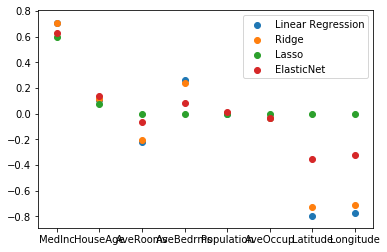

In [33]:
dfregs = pd.DataFrame(data = regs.coef_, columns = models)
print('Linear Regression Coefficients:')
print(dfregs)
dfrids = pd.DataFrame(data = rids.coef_, columns = models)
print()
print('Ridge Coefficients:')
print(dfrids)
#dflass = pd.DataFrame(data = lass.coef_, columns = models)
#The lasso and ElasticNet data threw errors when placed into the dataframe, so this crude workaround was used. 
#print(models)
#print(lass.coef_)
#print(dflass)
#dfelas = pd.DataFrame(data = elas.coef_, columns = models)
#print(models)
#print(elas.coef_)
#print(dfelas)

x = np.array([0,1,2,3, 4, 5, 6, 7])
my_xticks = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
plt.scatter(x, dfregs)
plt.scatter(x, dfrids)
plt.scatter(x, lass.coef_)
plt.scatter(x, elas.coef_)
plt.xticks(x, my_xticks)
plt.legend(('Linear Regression', 'Ridge', 'Lasso','ElasticNet'))
plt.show()

The coeffcients of Lasso and ElasticNet both threw errors when put into a dataframe, so they are just displyed without column headers. Lasso also showed no coefficients for six of the factors. 

It appears that Median Income is the best predictor of house price, while Latitude and Logitude have the strongest inverse correlation. This indicates that the smaller longtitudes (more westward) and the smaller latitudes (more southward) will be more expensive. This makes sense, as Los Angeles and San Diego (and their suburbs) are in the south-western part of California. 